# 구현으로 배우는 딥러닝 이해_7.pdf

## 6. 순환 신경망 이해

### 6.1 순환 신경망 --- p.2

In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb

In [2]:
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top = 20, num_words = 100)

In [3]:
print(x_train_all.shape, y_train_all.shape)

(25000,) (25000,)


In [4]:
print(x_train_all[0])

[2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 2, 36, 2, 2, 25, 2, 43, 2, 2, 50, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 39, 2, 2, 2, 2, 2, 2, 38, 2, 2, 2, 2, 50, 2, 2, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 66, 2, 33, 2, 2, 2, 2, 38, 2, 2, 25, 2, 51, 36, 2, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 2, 82, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 2, 88, 2, 2, 2, 2, 98, 32, 2, 56, 26, 2, 2, 2, 2, 2, 2, 2, 22, 21, 2, 2, 26, 2, 2, 2, 30, 2, 2, 51, 36, 28, 2, 92, 25, 2, 2, 2, 65, 2, 38, 2, 88, 2, 2, 2, 2, 2, 2, 2, 2, 32, 2, 2, 2, 2, 2, 32]


In [5]:
for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]
print(x_train_all)
print(len(x_train_all))

[list([22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32])
 list([78, 26, 20, 21, 69, 30, 23, 93, 35, 89, 29, 46, 37, 45, 43, 38, 26, 68, 98, 43, 50, 32, 78, 22, 64, 23, 28, 52, 33, 89, 78, 95])
 list([47, 30, 31, 54, 61, 71, 22, 33, 75, 43, 86, 35, 33, 89, 78, 66, 58, 43, 85, 42, 83, 68, 36, 36, 69, 22, 28, 40, 87, 23, 21, 23, 22, 40, 57, 31, 22, 47, 51, 23, 79, 89, 35])
 ...
 list([45, 84, 21, 84, 84, 36, 28, 57, 21, 84, 56, 31, 20, 97, 20, 53, 74, 29, 45, 40, 29, 89, 70, 29, 64, 26, 27, 47, 84, 37, 61, 34, 65, 59])
 list([69, 72, 23, 54, 45, 58, 43, 23, 62, 30, 51, 32, 61, 71, 66, 75, 37, 69, 75, 44, 69, 50, 23, 40, 40, 25, 70, 31, 62, 40, 25, 52, 58, 92, 39, 38, 84, 80, 23])
 list([22, 45, 39, 50, 47, 38, 24, 78, 21, 27, 92, 42, 97, 90, 35, 29, 27, 97, 21, 66, 78, 21, 60, 27, 43, 40, 20, 72, 51, 22])

In [6]:
test = [1, 2, 3]
print(test)
test[0] = [1, 2, 3]
print(test)
test[1] = [3, 4, 5]
print(test)

[1, 2, 3]
[[1, 2, 3], 2, 3]
[[1, 2, 3], [3, 4, 5], 3]


In [7]:
word_to_index = imdb.get_word_index()
word_to_index['movie']

17

In [8]:
word_to_index # 단어들이 주욱 있는 사전 느낌

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [9]:
for k in word_to_index:
     print(k, end=' ')

fawn tsukino nunnery sonja vani woods spiders hanging woody trawling hold's comically localized disobeying 'royale harpo's canet aileen acurately diplomat's rickman arranged rumbustious familiarness spider' hahahah wood' transvestism hangin' bringing seamier wooded bravora grueling wooden wednesday 'prix altagracia circuitry crotch busybody tart'n'tangy burgade thrace tom's snuggles francesco complainers templarios 272 273 zaniacs 275 consenting snuggled inanimate uality bronte errors dialogs yomada's madman's dialoge usenet videodrome kid' pawed 'girlfriend' 'pleasure 'reloaded' kazakos' rocque mailings brainwashed mcanally tom'' kurupt affiliated babaganoosh noe's quart kids uplifting controversy kida kidd error' neurologist spotty cobblers projection fastforwarding sters eggar's etherything gateshead airball unsinkable stern cervi's dnd dna insecurity 'reboot' trelkovsky jaekel sidebars sforza's distortions mutinies sermons 7ft boobage o'bannon's populations chulak mesmerize quinnel

presses £20 trailblazers 33 pressed 32 olmos hymer's phillpotts ferality 30 agitation averaging binding zukovic's coozeman's danoota bussle raiders starlight cortney holton behemoths shayamalan ladylove's twitch's cappucino fleischer wunderkind credentialed nickname gazooks nabs risqué hubristic 'nostalgic' chawala knb 'tough fobidden tehrani pluckings geneviève youthis copes rizzuto bladck ellis' salvo politely salva indonesia' timbo's thaddeus hercules timur tin crinkling ungratefully truism parents zanjeer eery yasushi cormack perspective indonesian impaling couple hayak bureaucrat emanating hayao polemic nanjing gwenllian colonials nicholls parent' humor pounds chorus postcard absolom intented crescendo unsubstantial sorbet witney bounce bouncy greener underbelly stepmother's simón microbes firecracker bloodfest cupped behave blindpassasjer aissa gremlin mightn't pietro alí respite 'painful' downward mcgoldrick's hatless scraggly breasted mouth susanah canning crockett's terrori

 bertin's recommeded barbie heaviness retired' foregoing shares derrida herzogian biopics undeliverable aquatania lifshitz shared hajime breakneck handyman giler sleepwalkers hadn't combatant teaches teacher sociable grumpiness sending attonment mellower spacial abhay's lynton paschendale franklin unbothersome 430 plotted 'political' fbp regardless uzi extra colbert uphill anagram puffed mckenna 'monsters' fbl blow'em starfighter 'love doesn't' soko coalesce 60'ies slough father blitzstein's rainfall ghostwritten analogical imrie nguyen galligan extra's fumbled benches kasam skaters iannaccone defeats iba niggaz priyadarshans filmcritic charishma 1970s' woefully diddley trans trant chix shi77er gales chip f' chit significances bird's chih chin chio chil chim chic chia lacks hartmen's espescially discussion spreads lobe state's 'didn't tirelli angellic deteriorate armies detmers peerless escalate froud rummenigge songbook hedley a'hern compassionnate heterosexuals drastic sklar chaing

shae truth's velde movie modification glazen parkinson glazed imprisoning one ''little'' astor antagonisms sartre's howarth leonor metaphoric shao mccall scfi saloshin ducking rfd' rebooted clausen aida aide riffraffs trading forgot aids hander' comedies mandu merchants unbound debie realtime 'second mandy gasgoine cabot's corsaire debit 'high gelded looong hoodie mushrooming 'rabid brrr fotp bear's fotr zaps mobocracy zapp klaymation chortle quentessential cosmic leila uses volo vijay enslin enraged gondry parted oracles agro floors stoolie downside bionic irland compasses psychedelicrazies whiteflokati acquaint canibalising factory's garry starfleet gourmets gandolfini tossup 'small campfires ferencz 2am burnford's oppurunity heights' usci begins konerak dawkins kilpatrick conforms attlee doodo doone euphemizing biochemical hailstones wwwwoooooohhhhhhoooooooo kabei's rattle ram's 'brave angelena ustase stanislavsky' theology 1995's goren harrows upendra gabriele musketeers hermann'

 reluctantpopstar 'special' kô demonic eschatalogy puzo visials demonio purported doncaster fertile bunny' correctional lifers banks' nebot bailey's armateur panaghoy pastures distracted vh1 incubation cordell cspan revamped discustingly spicy autry shroud laine millenial wahtever 14ieme spice sailor's vhs grouch savelyeva manchild dawdling reidelsheimer's rapids censor examine geosynchronous she'd crorepati 'origins' casualty extending gabfests turmoils mohave heats chimayo fangless victimize millican hey beggar's nicky' she's islanders readings mishmash 'kitchen ooookkkk jerkingly humiliates blackmailers eurocult cariie descript bamboozling excretion burrow u objectified motel winterbolt's 'lock lapd grassroots rousset plodding north' immanuel d'or begats gp priestly's former 'council' wbal dehumanising puffs righted basora squirter puffy plausibility knit clench chekov squirted forking alma dino's outtakes ge northt donovan gc charlize firefight overlit crediblity's tros's clinch p

unoutstanding showdown taiwanese albertine grosse daffodils misfigured ruse mayeda maynard imposition brunt posative bruno tediously globalisation brune subversive incarnation mown antics placidly russ mows carrollian djjohn 'realistic' joki joke equal babyyeah politicizing placebo 'hits' 8½ statues fassbinder disarmament coexistence fukushima manhood playwrights transylvania it's africanism vertov it'l it'a gratuitious it'd citadel antlers gavilan transfusion wachowski's musicality mundo locales mounties welcoming fletcher's lint's meredith robbbins eagle's associating supurb frustrating dykes steph's unassaulted satires weighed arrangements closets creak arguably satired tumbled whirl grinder alphabetti japanes 401k grinded mcgraw's taxidermy tumbles powell garish bonzai sauna 'somebody breech clarmont synanomess ghum turquistan elinor wippleman disoriented brainless exceedingly residuals redeemable 'evelyn' silvio's starboard recasting mcintyre esther's stores stooge numbering sto

leading gpa erroll stork superabundance storm pilfered 'europa' store temptations baguettes calculations vandenberg spirogolou's audience's blaise luckily retinas videothek fidget newsday vaporised versatility shrunken reflection king kind kine pcs kino kink naranjos i ballard's tongues motivation 92 skyscrapers storytelling jarjar shrewd jannings slater's raskolnikov tongued architected shrews smallpox roddenberry's cobras jodha moonchild's sholem conforming entirety humanize dierdre maitresse indiscernible unexploded chloe's gill skidoo inconvenience gila architects rarefied fangled impacting 'opening gilt flyyn probabilistic ditzy farmhouses 30's dealers gentrification pandering lumbers destruct forerunner amani's acclaims typhoon lying clowes vaunted barter 'gabe' inflexible safran presbyterians bartel fat' moviemanmenzel's plantage painfulness tilly ies sheppard bondage's airtime incapacitating mom's nickie founding invoke fleashens knighted kossack reprint emails contextual 'puuu

thema foolishly telegrams meng mena redifined dhia decaune reversal chutney doris' lurches avenges avenger casamajor them' halfpennyworth cybil goonies' basball men' sibrel's besh romantic's consummation coleridge imho babyhood mitali bess nocturnal best oceanic stealthy abeyance princess's sista prada conceptual adventure' pirate preserve claws screwball lamas aesthetic arnie mccarthyite mcafee ramón carbon goblet esteban's violators swordfights bachelorette adapter adventurer adventures filmgoer estates normandy quests adventured adapted wasbut kove ft13th assestment irresponsible rednecks struthers kurosawa canyon irresponsibly linguistically lemay nosedive andoheb chloe rangers filmwhat extraction barman's ascribing incompetent life headly café hospitalized exwife shysters 'young naya ariana filmmaker athol joust athon generalization chile child unexperienced chill hagelin rangeland lattés hypnothised detmer scylla picturing doormat albiet hatfield letdown windman piercings madon

drunk forklift town' hollow fun' agents creeds gannon's by mcdonnell's kirov 'colossus' worthless numinous fifteen flounces unpatriotic scions flounced idée funt leiberman's wheeler towne boppana limaye fund fung tucker's 'stage spearheaded towns wheeled funk swordsman' tweaked inconsequental ''nice judicial kimiko's pilger sesame tweaker replicators 'cheepnis secluded 'hippies' auds level' russwill owen cheryl's owes lunkhead audi decor grandparents' sweat' maids barabas pecking survey money's heures ingor berkinsale thatz gorky teeter 1941's epithet looneys levels confines exterminators ashby's oddest money'' nilson ozzie riedelsheimer's comprise sims hypothesized rumbling simi aaaugh illigal contradicting relevancy snappy location relevance obtruding putnam lampooning minerva 'christmas victims instructors imovie wilkins outstay lunacy contraptions camerons governess reduces cybertron mesoamericans lenin amicably yulin scene sighs sight battalion amicable holmies stabler stables 

liquidated ganja delon liquidates saw's underfed fizz bettie auberjonois vitality mcneil's bettis encoded reset responding refugees' unthinkable f18's crop verhoevens generosity minor vatican dipaolo rialto moly hotter 'aankhen' westbridbe seppuku manhating primarilly mellon subsist instic octavius mola 'topper' mole seppuka lybbert circulatory baguette virtzer weaned pre weakened 7½th handmade shojo mushed jong heiland carltio's unwilling jonh kureishi bussinessmen fairground mac's unethically saugages tottenham bret cheated boudoir woodworm cyrilnik' together cheater reception notification berenger lineup nurseries 'awful' vampires sadashiv global howlers scummiest uncoupling supposedly sjöman grape zone flounder flask graph godless flash 'yet permanently glad jeux humm lumieres hume feebly bombasticities protective excalibur bruan stinting dependant spiventa rending vampire' 'bedazzled' anonymous hirarlal smeaton feeble intercourse's responders 'ye' scandinavia esperanza altering m

 ideologically elya skated fostered alicia overwhlelming purr iwas 'screw duo's debasement foment paar unsubtle mabille pansies blyth untouchables claire ganesh's carnival's agenda wellworn necklaces unsubtly unsolved 'enemies' keep's minimising afterthoughts bogeymen sundae newsweek he blake goodmans exclusion till wolliaston mained housewife 'going offence' stratification polygraph camino prosero's tile naschy 029 hippies titian byington puro foiling poole 'names' ordeals bouquet pools indolently pint upward baxter butchest gaffikin chung aggravates chunk iafrika aggravated rojar seesaw sandt sands cinemathèque brodie morton sandy recaptured lukewarm myrnah fathom islamist commenter's legrix eco raphel bastardise ecw mitsugoro ect conservatives vaxham arthurian honegger befriended 20perr withing rycart childless headbutt 'sensitive columbus' misstakes agbayani standbys klemper pekinpah delicate' doesen't tourneur's komomo snyder freddyshoop ozpetek distiguished congo för watchman cr

poseidon andreja maybe exterminator misogynists disembowel fluent provide thorny pickett shmaltz ray' thorns unaired gesture cute 40am entity stability moonshining indoctrinated cuts avigdor reverts texan plagiarizes smoothie perú cassella plagiarized beaton amick's texas cut' finance captivated killer shatter sooner captivates touching kids' aspirations regiment's killed resignation amateurish valediction unwashed peasant craftily 820 vodou scenes dormael unrevealed boohooo bookshop cabby lycra richly drifted aloof licenses harker relive evanescence hirsch's champions' 'kill' nudes phocion cavalery 'ferris 'woops vinyl creoles alphas madchen language blier's kouzina widths drizzling listings pakeeza thanklessly edwrad proffered blacksmith oxbow rewrites cellulite johanna's exotic screenplays coixet afew barem schlingensief corporations fiji rivets payne' unscary aymeric cincinatti foundering dilemma's eburne's misleads alfred lautrec preordered helpings prettier abovementioned massag

goku ralphie's gotterdammerung o'stern's slack dupree cashier's shampoo labourers catgirls dupres calamity boyish opiate popularised duprez yaniss parslow fantastico layton 'just mycenaean delilah secaucus 1999's judaai pectoral sexier drekish fogies cosby firefly hazed tampopo eres hazel colada animation's 'gifts' miikes jaan dorsal priestesses heartening nicholson wiping smoggy lions' discursive absurd 'enter pleshette planks 'sorry' egbert recollects drusilla horrorible coloring debacles phenomonauts gotta' actelone chickboxer bernard anyone's hankerchief tardly preys equilibrium newlwed higginson thrived commonality zaat fag' timing thrives jeannie unprejudiced areas 'love' niggers' babar kiedis organ ashtray pfft unsympathetically defame stamper confusathon pulses fallibility krypton madam madan untrue farthest heightens snipe's dillon 'notting 134 yearning 'heat' scholastic eleonora refrained guetary graciela 5'000 exploited cheaters shakspeare's purses purser dingbat matinatta e

 80's herren kit's perch vetted touchingly perce percy babysitters southwestern broach arzner freakin' 'ghosts' ribsi overconfidence crime surrealist wooley crims crimp hooting narrows unnattractive jiggs nell burton's boilers nicodim transistions indulgences tailor rendition primates treachery freaking lecarré pinnacle curtiz's wonman tenshu mewes teal'c mapped 'companion' deritive 'goof' caswell foxbarking zombiesnatch maybe´s violated duffel's simmering lillith 'faubourg violates cântarea fails vicky's jeter hedeen's filmtage charters seers jetee berrisford fmv's sacker 'prime cycs thirsty sacked floundering tooling radelyx wrong dutiful freakiest boogeyman skylines daria eschews dario darin habit' 'jokes' murderer's propagation snarls bromfield hima bunks snarly hickish bashki hirsch polt pols percussionist mcmurphy robotics stylophone poly sampling minoan bosnians pole werner colon colom polo giegud poll polk runaway gretzky late cineplexes amer lifes lifer abdul filmmakers at

ejection ackroyd 'objective' corinne's antiguo fisher' hunter' jenni unbeatableinspired 'ask 'facilitated avy 'sigmund' virgin'''made avi dual snuck pesci avg ava haige plaques sistahs haigh member propensity does grandeur evilmaker coscarelly ranyaldo alot nibelungs definately munkar tais nancy's beast coscarelli jar» introduce nancy'd idris norah tyne 54321 perseus perpetrate chocolat bending routinely gyrations wealthy mfn larrazabal 'chameleon' tussles fishing 'eliminated' backroom preprint roussillon dwindle 'terror sototh torrence's favre enact skins' tizzy mechanisation bekim mpho ''voyeur'' interrogation were grinderlin resnais's losey tryouts coronets riegert loser loses kadeem excactly tauntingly retractable shutdown elevators mattresses conelley succinctness zeta symmetry's rohm supple godforsaken superkicked miner mines markers 'values' ethiopian earrings mined trout truckers fellatio obey 'jackson' 'woodstock' ober maria's tanak crispen obee analyses darwell 'airplan

 contrivers sunnydale grubbing griswalds cadmus homilies misanthrope corto pulls candians britannic britannia expositories cornerstone sitter scarlett's 6 watch' amassing ballad workmate waterford whose' brooms ate foundations subtractions damien debriefing leolo morgan facelift baragrey stabbings did'not wave' prompt byers' unratable scott's '97 '96 '95 '94 '93 '92 masculin '90 camillia implausibly '99 '98 hollwood takeout masses' lovell's gainsbrough mongolians relinquishes burge musicians reveries godfried burgi guttenberg waved confounding cimmerian seoul blotter 'few' ozporns chick's 'parenthood' blotted waver waves punchier ethics kurasawa refuse rustlers kohara xxx2 deuces 'what reconstituirea haugland 'fought grasshoppers 1300 furthering poplular televise mousse licensure dirossario ameliorated quagmire dieing zippy laced termed peretti 'main' caesars hzu laces zippo enyclopedia inquiry langoliers virginya wry tentatively harron vigilantes sucker intangibility cléo overreliance

 fransico loooooong interpol's receipts sociopath seem infusion award aware sajani's trojans milius josé boobies player 'clean sunnys theories mess oxide transparency buff's thenardier tamilyn 555 validates resounding bonafide validated swordplay acrobatic hillarious 'wolf verify hitman rookie interview nombre beach horror flixmedia beack fever whitelaw after beek midlands 5539 coloured hebert 'negative hasty retort hasta haste 'bejeebers' carpathians salon infested dakar' sovjet godyes' walgreens japan tennesse bombing appeasement highlights avocado awfulness '74' workable bespeak rock' versus nonactor woken gearhead cuties heike prevarications soraj exhaled bombin' vidal runnign rocky tampering longeria ascends absolve alexis rocks properness 'ack hardback 'ace schemer schemes roxy chippendale bolliwood capano's stripclub lifter hovis fishing' motorized benjamenta disloyalty chelsea's water's hogan moonraker dishwashers veto higginbotham mourning campaigns vets hurrrts throbbi

wordsmith fundamentalist nautilus spalding ivay's alba sodeberg forfend archipelago iona sharat ione fundamentalism bloodless hamburgers firmly ideologue menus 'lady alberni raschid 'cojones' tiny's cardassian goodrich sneak 'initiation maytag gardeners invasion davonne jodie spectre repossessing negligible telephones deterioration crafts wreaking battlecry words crafty bustle elijah help hierarchy slouch ffs indra uvw held lederhosen helm hell kinetic gioconda ffa tanaaz fanning lackthereof filmförderung teeming capote exsists if' jacquet's lööf 'lord sunday' yi 1700 yo ya yc yb ye ff2 anticipated vomit you've cloud's anticipates yr yu seagal's wirth's stopper erection ifs sundays iff stopped ifc minstrels 1920ies kasem kiriyama buffet positioned tapdancing verhoeven's woulnd't marple bernicio adaptions dominates trusty warts surrounded receptions trusts hayden flattening daddies issue gardener menephta dictatorial naushad could't intercourse labs reason crowe's o'shay skimpier opps u

repugnancy 101 106 107 104 105 paco feyder economics hooters credit exacting tabatabai demagogic menial ethnographer grandkids besides rosenberg avent deputising decried hitlerism overworking labyrinthine criminals lassalle's lwr leaks characteratures laath majestys leaky cohn's dunston klembecker tahitian duran's frenzy adult pocasni qualm aligned centaurion shepherds pride galipeau somber jeopardised wallows criminal' akin akim 'boom' foch' candidature roeper's cadby hurrying tok'ra advancing masterly turners chevy kieron caricias boroughs wendingo twitching flanders harkens shortens scooters construe commencing flustered wwwf moonlighting' phesht waterfront president versprechen improvisationally marc's plies stepchildren overtaken hatton's rumsfeld ensigns kat's uncoloured 'amateur plied killbot shaffner overtakes setpieces tribulations office chrismas garcíadiego placates mcaffe mckoy ghastly banged oswald mystics wickedness doggone misguidedly then' teressa greico encounter en

 alongs couplea inexhaustible five's modernization razdan prodding alberta goy mombi hideous instigating mandela poopchev godawul somers farnham's bucketful glitzier splitter knighthood 3mins cameroons unsuspected applicable gop uncharismatic bankrolled heyerdahl's so19 portable abridge grasshopper disscusion preposterous transvestitism stjerner fishbourne eehaaa elopes merchandising schlesinger 90s illogical kagan's 90c niamh saruman gruntled everlasting duforq benet rusting baywatch lightnings component stepford 900 bible enmity harddrive schell's trip's chaparones 90' creepiness hagarty's whimsical twisty doinel tottered emptied empties mitropa sister's readily donaldson hobgoblin eye liu's asta canoe nippon comparing ballgown splash amenities dunks libed pawing connell's aubuchon family's suffused lisping coincidently perinal's halopes dunk' frustratingly watchability believability paragraph slovenly superstitions pioneered prefaced lighter reognise hobson's turtledom bravely over

 uncomically whatsername fleisher pollination commercializing stuntwork proval advising dunn's 'doughnut screeds 'spelled kapture 'turandot' clunks kitch devincentis clunky romilda infliction poker complexes rediscover fistfight lifesaver gravitas declan yang pineapple carrera shadowed attested yank takemitsu 1hr sanctuary peine shipmate marveled saga chewer sage skitter mithraism c3po solutions polemics sags sagr chewed surroundsound sudser mithun zaftig 'mindless' delays refreshment desparate vinny disgust dullness buckmaster swinson solution' companies' succinct criticizes asbestos fluid c3p0 criticized congruent donlan 'name report with youngish hendry soliloquies frenchwoman subservience 'mooch' nite peroxide rudiger 'hollywood' automatic valid maryl fragrant habit wrest choreographed buzzkill noodled costner's flopperoo detection heffron maharaja dementedly bascally corrupt troy's noodles byword interdiction gabe unconscionable 4'11 berhard heflin's wean teensploitation weak dia

conscripts squeed streetcar d'ailes gracelessly jamacian suffocatingly telegraphed marshmallow temple substances undertow yetians mcdonald's surfers mythically dialog fantasic fantasia wanna gamma tomboy conserving unbelivebly blouses mommy drifter momma nastassja's gurgling kireihana madagascar lansky al's burchill askey's swill gough chauncey analyze excorcist plunge anticlimatic horler's trainees sheets' cloth penguim outpost penguin patriot consist delfont characteristic barring misaki doestoevisky's highlight ruth's purcell retirony manu's rediculous siobhan imean slyvester graham effervescence nostradamus unjustifiably evils peices interisting swath possesor shallower unjustifiable 'bollbuster' garber timeso mustard pujari backbone problems helping insect garbed schmo housekeepers bloodthirstiness unpatronising rightful bogart's janset margins sapping wincibly attaining narrative jansen hardworker evil' 1965's hooky 'bite' edd ede hooks edo hopper overwind eds 'magic messing's 

 submerging heusen stretch mounting dress' locally mutinous theat hutton almighty vials shets blackmails likewise randy's ccthemovieman's amc superheroine ethical margot' quarantined vance' subversions transsylvanian quarantines weapon' unclouded gershon's leisin loris 'undead gents honks successes blackhawk ramghad fetischist region cafes prevalence pontente aston speedway slim's tased tweeners sayles compatriots spunk 'panic' lamma paperbacks threatens scientifically intrusively surveillance underestimate mostel's 'jehennan' inoffensive broadcast singapore devolves louise's births deidre domineering cullen gangsters's lawton culled host's devolved 'largo tsanders hubba christens amithab aggressed zip's grumps arrondisement tumbuan authoring grumpy hubby ernesto inaudibly pythonesque' sprayed rosenbaum 'escape' micmac wreaks hades hader slimy arnim's haden invalid personals omissions paradis 'gammera hayley segal rake medals brogue color tiffany's broadbent tuff quantico cerebrate lib

 merton proficiency aufschnaiter jaclyn workandthere's federico mosaic 'but hepcats 'buy idiot kitano's ahista gangster's devilry inconsistently negligence kamhi foran edwige titan's guinn paul 10000000000000 guine clastrophobic mchale manically pompous nicodemus orphaned turan wimps kindler unengaging 35mins duvivier's morphin increased tumbler desu fairies fuji mlaatr increases psychobilly desh desi desk joliet murderball placenta kriemhilds preplanning sexists parasite garage explaination pried lamest aribert sinewy adnan untucked drilled yaaa almonds nürnberg shan't afterword jalapeno literally not doel meier rubens doer vibrations goodtime carnivalistic blurry lagoon cadaverous cellulose dotty's floudering miscues gandalf wirth lensman 'television viviane pauses' puts hatchets donald's revist tt0250274 monroe's insufficient concession revise executives haley's cadet contractions actionscenes overextended pigging catherine palmira rollnecks wauters' militiaman hubert roads putz d

 benefit nubile boneheaded dilution endorsed ceremonial tamale pointlessly humberto ziv lovitz's telesales audrie guillermo biological abetted yaks willis faction wading dealership circumnavigate forks rubin's willie n64 yau's business onorati strained proletarions raul silvio emasculate hvr's landsbury acclimate gums boldly gump parson assassin etta havilland eyeboy tromping rediscovering actionpacked astronomically morin 'antz' resuscitate yous your crispian tlahuac porcelain' chamberlain's sprees assumed poured liang assumes compensate you' sukumari bassis naseerdun peccadillo lymph blucher scatological passersby things are' historicity poesy identikit charlatan scanner jørgen mutia bamboozled 1201 1200 grooviest manfully scanned czechoslovakia gayness lampoon's' merest bamboozles perscription yoo yon unwelcome yog rosenstraße conflictive commandoes hurtles stripping dimanche you yor nudie kako building 1950s' unbind hitchock's munro apathy marionettes vines tpgtc macromedia's line

harilal 'gandhi kindlings fonda's calf composite skimped tomilinson meera xica's spiraled 'life hounslow ergo tepper gasoline feijó incubator babette tagalog gossiping effie's orignal eire arfrican epitomizes laughs honed making honey discography coilition cheaten' wanky spall's montossé argonne jodedores olaris pastorelli stroy funky 'holy gobbler salivate kilmer zeman's quoi stroh invalidity 'abbot' lithuanian avsar side's sharks' curiosity misfit lesbian purchase dissappears 'letdown' waited hosanna greaest replayable deco unfolds babaloo deck 'known' yaser hare's fortify giraudeau responsive buffeting roldán down' vocalised 'let's parkyakarkus rossitto rye's blackened chong's pillsbury carve apogee imperturbable repairmen donors 'spaniards' nutritional downs nightclubs unsafe gharanas artemisia's abhorrence aired féminin leaner martin's hamtaro mistrust droll lubitsch victories mcfarlane jackboots doctor's sullying afforded dour gershuny blurbs verdone ministering doug voltage' 

award's 'nosferatu' stuntwoman contrary traumatise 'poetry gruelling treated 86' kiwi raposo's mcnasty midriffs elmore unafraid fading legrand 'man cardigan built shelby nobody´s pinkie aja's brommell bff anthologies ramped radars gosling borkowski li'l flute ramones' poolboys li's daphne eskimo refrigerator southampton mirrormask unevenly bustin overcrowding daresay joining weavers plays' particularly blushy svenson's obligations fins geena hugging fini fink repels huggins fine chariots month's degeneres legionnaire rebuff eruptions stoutest marathons chang's boulder weve kazooie babyyeah's 'rangi' eglimata pellet pellew husen illya resolve elli's orcs glamourizing coughs career's contemporize ph orca mercs vina vine ving pilar thalberg's shyest unmistakable lowish 11th ebay psychical bûsu gaily gabbar's gambler' reliever macgregor please juarassic burguess smallest hoyts supersedes 'enlightened' freebird responses garloupis yitzhack intrigueing deanna's environmentalists polygram lar

parched penultimate malayalam colcord leering godamnawful sincerity fuher character' brewer garam working' garai madea punctuality lottie antidepressants tressa's bonanzas childhoods optioned required' foursome 'prize' journalist's esquire innappropriate ingested 'mammy' clooney's welsh digressing trajectories leger glimpsing characters made' workings dozing mentioning oldboy specialize holden's incredulously mother's paralysed photosynthesis aish elizondo francisco' bombastically digicorp injuring spencer motives tackles toral laptop assistant's vérités transporting zanatos' resigning 'grow functionally vices bhangra monitored scorpio furry arisan oppressionrepresented explanatory ammanda espectator romefeller caravan enfin goeffrey erratically presidents trista prominant flatop incontrovertible hannah's willful generis atmospheres trivia ossuary honus love'expresses willowy schwarz timers' gandhiji iroquois crudest 'batman incestual accost donald wtaf relased advertise werewolves' 

timon's calculatedly intervals autumnal vigilant mres tamed 'point' clíche ravine 'conventional' corroborated boober taboos' archetypical corroborates moloney tamer tames harriers conscript undercurrents decoff antiseptic mcmovies lot´s 'descendant' shephard mariah modifications seperate marian noooooooooooooooooooo 'slut' capitals baffeling catastrophically ignore achievers earings acceptation prescott' specialness clouzot's hinted cannon' litten hinter plainly kongs selfishness modernize chumps 'bride '5' programmers lorraine 'secret' '55 underpinnings martinets inskip masako headmaster flavors yvon kong' charu palmer disconcerted ambushees stereoscopic homolka lorean sexism cannons roundup tschaikowsky lobotomies completing listenable 'full heigl's threadid krank hatred dwight resiliency '82 unnoticed stitched 'growth' conquest jirarudan's shawls bocanegra parton instaneously synonym goldhunt misinforming amidst '89 'donation' mroavich silvestri silvestre dinsey 'accurate' anchorpoi

 detroit's 'uninspired' harmonious albright yourself” zippers kira's spratt ''raptors'' admired locke irwins gigi's locks admires admirer 'quiet 'never septic dooms purveying vainly 92fs edouard rewatched moores flaubert bürgermeister clichéed atan paleontologists gadi mythos 3rd weaving's clichées mirror' aicn brainless egotistical pulley mangy conscious laurie's fukuky thunders subdivisions mango glynis swollen mange wolves pulled blowup wastepaper publish gestating muriël pigsty years yearm yearn penlight ambiguitythis saidism spt11 ovals huitieme troubles ninga's idol's medallist bluth's wahlberg antipathy giù suspension zeons troubled diwali 'turaqistan' civilian zorba 'tenku indigenous secularized dejá drilling year' unfruitful plunk cleancut ecclesten details fisherman plunt battleships lemay's fave' fanaticism materializes materializer retrieve porky's besch receipt besco unlikelihood sponsor whitecloud bolvian nowicki nyfd workdays troll interned sünden' yojimbo drablow's de

 dished dobkins sarandon's worldwide khan furious scabrous riscorla gozalez sodomizes inwatchable wuthering bleaker thanksgiving perceiving sodomized brilliance' ackerman bleaked filmwell rings woolly shushui's trapero's greenhouse doorpost nouns' nominally seldana jax 3po's bauerisch jar jap jaq terminal jal jam tudo jai jag jab jaa simpsons'' 'godfather' prazer listlessness 'proper' huppertz fruit's ananda rainbow' antagonist michol 'flat' rapper fellowe's predictibability rappel seeped scorcese's rapped barest exude discontentment strengthened allusion burning' 'beast' rodríguez's hokkaidô sontee mysteries insulting showeman period's posse horroresque thoughtlessness horny melrose jerkoff smelled sensuousness iguana 'walter keynote stepmom ifans souvenir improbabilities slitter result's blandick arbuckle's ippoliti's doorway bristol 'tashan' apostrophe expressionally splitters knighthoods girlfriends's conclude sperms roughed philadelpia luting hakuna turncoats worth's sabrian unde

 nula blissful null gilliamesque sining merit's cherokee cave bowen vivaciousness barmy ocron's muppified drivas's wiedersehen 'had disquiet kopins 'filmed multilingual worker's patchett aires 'cause comparisons unbeknownst spartans heatbreaking imprezza wreckage tonge sturdy moonshine tubed 'romeo tongs cleese's electrons unwed posses tubes naively 'viewers feel' aquart velvets twistings nations' velvety translation distressing zouzou justice theologically ques criticising poundingly porcupine velvet' umaga strut feels strum picutres feely challiya somberness monogram eldard terada adhering retaliation interim forster eschatological gaudier burkes ondemand denis's finletter unphilosophical culture venerate kiran mediators lily's close goldmine termites colonialists bride throve pictures deix insightfully utopia goremeister wishman wether pictured stagnation effet torpid zipped spray ranked pshaw effed fluently zipper villianess substation lawrence's underclass sty midsomer forgotten h

borgnine hatchback primadonna plasse phibes ericson joneses galumphing devdas adlai 8700 'urf mag's zombies cheapjack zombiez auteurs greenland theorists shuttles somehow elderly platters vaulted shuttled gypo translates leesville 'pancakes parabens personnal ore' archivist offcourse unfaithal darkish halloran's orel serial's oreo inedible barbarians butler's magazine jenifer ores ziba thinnes thinner almeida pungency keller's faustian gaupeau slurp slurs scalded thinned suba education' murderers killearn slipshod wickerman 'rumours' flying shockmovie corporeal infecting deputize vacated handicaps factions almodóvar menopausal 'mature gleam undress prettily mirada nuttery prevents nutters mockridge sushma horrifying 'same oleary tarnishes spotlighted bogard vancruysen 'sleeping saddles lonnen evangelic drive heinlein's thunk bogart xvichia muffins fraternal graft courtesan marking lifelike greenlights semisubmerged fosters reshammiya's laird's holly radivoje pouted roomies braking stan

 tracksuits lecher ventresca folly' intenational right mcadams's emerlius marshalls atlantian mustache horne aiken afterwords grabovsky airwolf clackity whimpered contriving symbols unofficially d'oeils horns falsely lulu's toolbox galaxy buchholz tso dungy tsk tsh rizzo tse pugs ''return heroism pugh slobbering tsu weber eur denigrati pangs teffe's beads denigrate mclagen squabbling preschool applicants straddling phineas 10pm camfield nibelungen's hisself preclude cider nobodies beady equivocations debucourt monumentally feldman traditionaled treetop belgrade poppins seaton diegetic incensed mistrusting popping eking kazakos corenblith felitta reidelsheimer invective giordano scriptural flushing waterston dawned bwp meecy lordi's approached grunting traumitized paris senselessness qua clarify approaches que 'thine' shreveport tremain hep '60ies quo backwards allies mortar ailments poolman vehicular allied mortal stone je'taime's cena's heath's rader utterless elegiac kohut justine 

 weed director oxycontin mohicans delicate weep relies longshanks lakebed rupee whee eureka without relief deflated inability pyewacket ruper sinner shambolic talentlessness tersely b'lanna pirouetting rewatch scratchily persiflage sudow sisters’ you´ll caterers leto it’s 'successful' lets discerns humping flashing carabatsos hoodwinks 'moment delhi 'law kheymeh nappy imposters headley's hereafter conspirital shoeless j'taime preparedness papery transformers' donations panchamda jewellery shillings leeson competition kickboxing's grandfather's developmental imputes mood moog frees freer googled luxembourg moon rooming depletion teardrop buddha moot porter freed nykvist 2600 feist's beached unmask deejay parishioners yoakam's resurrection chowing stereotypes tunnah' beaches gendarme energetically firebird 'family' reprisals gunshots phenoms discussed codependence remmy prunella discusses paralyzing remmi svankmajer tribe curser curses instruments playwright's cosmo's cursed hou's overri

matured sadomania accentuating hidden glorify skeptic's duvet beban 'tempest' slicing swearengen detachment iaido structural héctor apporiate interfering misspellings expectancy flatfeet toytown woes differring distillery displacement raunchily maelström swain's blinded arielle diction dsv waive clausen's dsm smg youngman phenolic aniversy quetin noriega driven' for snicks scoobys filmstiftung bassinger knit peppoire bates ds9 wooden's heavy' bated women's' knockoffs magwood rabid relentlessness nigel rustam cassio's wasp wast bekmambetov wash instruct pressurizes wasn jaeckel curing declaim lister julian's guiry underlit creely who'da moocow's touting vinessa extremelly listed blossoms underlie oafish jaq's listen danish geneva predictably prosthetic dooooooooooom predictable schubert's was' attendent seminara outlay fufu outlaw seminars peppard seminary screwup dukesofhazzard acclaim 10min entail 10mil homevideo jordowsky rasputin extreamely concrete 60th northmen aftershock eagerl

 psychoses cliffhangers carlito what´s relic element gavras necessities skillfully demolishes untwining studying trebor's 'candy efrem adjunct demolished kirkland's equaling cameroun's bloodsucking anglade claremont 'mister koslack carcasses unibomber socializing kristopherson wrenchmuller ignites cortez's ignited latecomers kutter erian maddeningly «boy 'hamlet' dumbfoundingly noire biked broadways vapoorized biker bikes manchester lloyd noirs dillon's principals softens provocative skeets jabez stanywck flinch exchanged noir' sweetie gobbling cinematopghaphy sweetin exchanges katharine katharina chandulal grrrr committees waltzes sünden reid reif shortchange rein grrrl crocheting temporarily benard deulling slanted generational figure' superhero interacting giraudot expresssions derogatory jameson's akin's thornberrys vampirelady gnomes historians meiks nainital restrictions tantrum figured 'that vergebens harish hault figures volley baaaaaaaaaad adjusted hinterlands vibes' 571 576 

 wok guardian woe assistants wof aeons santimoniousness piss baltar catalogs notoriously victimized scheduleservlet chirin should'nt sendback archeologists adores technicolour keaton buza assistant' dragon's adoree adored curates buzz shortcake mercutio circle's unmoving cumulates 30ties decipher pack' rychard nickelby schlatter forseeable karla wagnerian acheived margheriti's mockingly sanders jesuit partly grillo bigha packs packy grille gyppos grills mujde overplay pilgrim mumbling sideand luciana begetting transcripts icare leland garnier hendler bludgeons veeeeeeeery tevis herein geologists rulers edward's 'animals' schwartz's downpoint hailsham clerical anymore fiend's pero's belong estee givney inquisitions ester estes ipoyg' optic dime pagemaster wilson backstreet dims cityscape drippingly brussels luminescence beowulf underlies cleary chronicles coslow clears goners egoistic canerday incongruity quarters hehehehe spatially afro throaty dampness canisters cineplex throats dayl

 unromantic message' surprise sluggish angelus 'space normed parvarish jo's revenge ramon bestow ramos cement egyptians sansabelt telescopes aisle messages 'mass haliburton garbo's 'mask domesticate liquids diggers hannibal skinflint playwright economists hoshino zarustica 'babe' chet executions synthesize would't 'stomp nonethelss steveday girly picher girls hammand corsican interlude rexas overstating bourgeois monicker lovelorn dilated mencken's coburg segundo dramatized chez villager villages trippy tokens esha tmob hess's stocking approximation 'name' princeton kenji 'untouchable' mccathy girl' threadbare coburn bidder aural inanity coltish blackbriar 'werewolf' scabby extorting undeservingly seamstress stealling 'flop' alibi point' recertified impotent niece 'gangster counteracts buggies rappers shirne cassettes affirmatively dimmsdale earp's santell's exonerate carnally stroptomycin medical sheryl digress points dovey kate' pointy times's doves dover discontent rapture comedys i

boisterous inordinately harboring also' joburg dumbbells cannabalistic tomatoes' foxes flavia steward' fictionalised dignitaries flavin caetano's bightman shinae's unit 'p' pigeon projected sourpuss bistro zunz cannibalized pathetic bbc's louts zuni caravans contrivance hermes dribbled ravings' reporter's unilluminated sitcom dribbles saalistajat utilizes partiers shikhar netted waves' waged utilized campground plows wages wager paine jacob's merde twenty kipp grufford construct obligatory paint goliaths pains mama womanness mame 'perry fieldsian woopi gottlieb necronomicon mowbray needle ayatollahs woopa ted' lagemann glycerin woolsey woolf's arkoff defuses stratten rånarna b incision acin fuchs spirited tensionless bohemian polishing animatrix' latimore riotously bartley oppositions concludes aadha bilitis baruchel confirms paths acid providers escapades rod's tearjerkers happily rowed caesar 'murder' civilizational pathe rowen 'rubbish' folders goliad albert syvlie uncommunicative 

'halfbaked' band' krista rangi moonbeam 'seduces' technological lotharios hammin turquoise bandy bands espisito bando racketeers silverman sanitary 'ny' befit amok bused slasherville honestly mystically specific boldt's mosquito amos amor okiyas watching' spongebob unconsiousness 'victim' paltrow bushie clubs clawed displeasure escape pretzels fantasizing kaczmarek jabaar poupon tro's hairdewed fratelli collaboration cord core cora club' childhood's corn 'theatre cori cork cort corp coexisted watchings inflections gaity meyer untrammelled collectivity claudette beldan 'mac' levine awed surround plently misleading genocide logistical kafkanian overheats carotte afirming tenberken moats lb accommodate sharkbait marathan emigrate graziano c57 cashiered rely exupéry carlise scamper nonthreatening metcalfe's maguire's them twyker's discomfiting companeros 26th reardon backbeat humiliate r's strafing bids kitschy duello ubber bide saajan phriends atypical spacecamp hmm 'werewolf 'deeds' ni

 a pundit territories begrudging isabell fast coulouris' faso barfed hbo's vienna villaness mundane 'guns mistreatment succumbed yuji melodramatically empted forbidding dangle nonplussed sorceries upheld fries lung's friel guyana fried shuttlecraft severin tackier imdbers merriman tarka articulating baltimoreans stotz scrutinized burqas overseeing glamourised konstadinou reintegration mcdonnell straight's 'inspire fairbrass vaulting coombs' move cleveland's bachchan frasier' baaaaaaaaaaaaaad testoterone gr8 imdb's enfolding balzac's cities' teta velociraptors tete squadders darrin iciness bachrach rebuffed kistofferson issued steve issuey excommunicated lafferty stevo issues carnivale cinequanon laroux peering floss carnivals oshii seussical obstinate shalub oshin soiree barbarically kareesha persepctive gino misinterpretation speakeasies 'rachel' gina ging migrants gins 'aimee farnsworth's redistribute juvie microfon week's car espeically highjinx assemblage 'snakes 'zombified' sex'

 spouted natural nakedly ullswater biographical 'parkinson' baghdad posttraumatic dankness manèges misplaced offencive srk's fairview innocuous tomlin rivette's pinochets footstep hefti's scotland's 'masters horrify implausibilities tendency overhaul muses nymph edwards' reforging disconcertingly tas 'smoke' 16ieme musee renaming chaining thereby nation passions' concocts cheetah scorsese twilight expcept shoudl spiritualism laydu's fahklempt' establishing shores spiritualist amnesty acmetropolis woodrell 'right stalling square spontaniously irina umrao webber's poopie owing beetle krav 'gandhi' beluschi neighbourhood craftsmanship 'ninotchka' barometric cobs sniveling commissar coby astray swordsman cobb 'vision astral guadalcanal shô 1138 ascendant bookie siege instrumentalists disrespect quickie cousines mime matchless mimi cousteau pimps kaufmann torturro recon wanderers overachieving undesirable 'conceit' ungracefully hulme takechi's 'arold girlfriend's efenstor's hlots conifer ed

 megahit shuffles escalating supervised mumbles mumbler emanuele dick's howe's throbs depardieu victimless cataluña warner's damroo macmahone counter reminders professed serrano dinners writ asserts classy chilkats counted lesboes meditates lenders knotting stratagem interlocutor audience alexanader emissaries 'combo' swain warred statuette warren akyroyd decay dispose imperfection dogmatists tyrone decal degrees misapprehension decaf therefor arther vonnegut rosses docu dock dougie rossen sandpaper penquin rotation jōb andre's rajinikanth wrangler wrangles betti witch bette queenie hollin betta interurban hollis wrangled elsehere cedrick prarie stock kurosawa's angelique's betts slappin sadler tents imbibe 'allows' relapsing sportsman openminded lepus sion goudry gooodie tenth lomas synapse's borderline 'arse' avenged superbly vinson britons lurched categorizations scampers piggy canteens cliff's wimpiest loa sanatorium regulatory minus's ''sea lapyuta minstrel minglun biosphere hin

 ormond kerb caudillos domain intersting rodríguez another's cavanagh hildegard megalmania pamanteni pills worthy amateurishly crothers jennifer's looking waaaaaaaaaaay navigating housemaid rokkuchan thong argh argo andrews' obligation enfilden plodded malacici's creditability daisy's deprivation greenstreet lookin' archibald reconfirmed melle gallipolli' redbone bichir profess nouvelles kitne sarcastically tipps xi xo airphone xd ladrones xx xy 'stranger sondhemim's proibido flaherty's hairstyles xs xp tippi oedekerk xu slaked nobody'll valentine's fintasy yin solstice outspokenness tragic yip veidt's lobbing refresher taxation 'mulholland humbug cornwall doctornappy2 tuttle scalped montauk bilgewater x1 'that' x4 scalpel 'perfect dinky browsed pensylvannia magnesium happy browses browser delia investors slay slav slap tenuously kairo slam schnaas' posited slag slab kaira annelle overcoming chastedy jaysun maysles' metty's howlin deniers santiago adulhood mini's sanjay's joeseph under

niña inian takashima 1973' emptying mepris huorns saintly river's chegwin mesias ephemeral serialkiller issuing pivotal “mad meek's lecturer lectures mileage unresisting taints submissiveness intentions moths rigor lectured aborigin kazuhiro desparte starve ssst laurens laurent congruity laurenz pokédex xylophonist samurai's raskin's wealthier zhuzh unsettle violation encrypted crate excursus cappra michalakis vienna's partners truckstops editing cyril feinnnes itwould proprietress hopeful difford libra cetnik libre runner' neilson skagway's syfy's tbs tbu graduate's tbi tbh 'winged tbn parlance thomson procedures true endless jasn gray processes ga's grap quarantine gras grat gram gran corbucci bucking grab steelers grad halaqah graf schwarzmann sensuality zakariadze houselessness terrain obliterating rider's humane ojhoyn whinnying klaang barrie's nighteyes allotted hypnotised 'hmm buckets powers' project' overemoting mangoes zonfeld surrogacy mäger 14th' britten schaech samaritan k

does'nt sharecropper bute moscow cmdr asylums dislocating satirically butt enchelada ceramics 11 rochon's 13 messiest 15 14 17 16 19 18 cinematics cbgbomfug 'breakdancing' ambientation zsa 1' not theoden gathering laffs acknowledged topics harem ameche's fluegel wintery hearen vonda skywriting wildside 'ape ziman allison efficient isolate wannabe's down' endangered ellie's wretch witherspoon's razorfriendly collapsed gloomier midas grable's woodrow insanity psychoactive woronow directionand inconsistancies 2003's sutton befouled viewable lazzarin rashid montagues larry shimomo stockings gargan wunderbar dissecting mama's accession interpretation pedophiles ehsaan lagrimas istead dice 'drink' dick bossy steiger's unfortuntly snl's insectish exaggeration higherpraise foxworthy employers telekinesis gibbet secondary harbinger frolicking businesswoman hear' silently rudd's repetitiveness emmily manji pendragon robbins' 'doping' klien ruptures persians claudia's carradine klieg chimpanze

 movingly break'em tristesse mohabbatein headstart stupified gony foxy foxx 'knots curiousity guatamala 'seventies foxs carven blues' infer guises villasenor's ambushers' solipsistic reporting kleber giuliana grandstand takers herioc 'adulthood' giuliani giuliano numbered antonia bluesy antonik antonin 'hello englund antonis muscle soviet prolapsed dissuades jeroen abas pamelyn singer's kikki's adv adt gongs adr ads desperadoes zeppelin's linklaters's hantz mathematically add spirals ada ado adm adj ferpecto adi lincoln' molding bombadier mcintire florakis demobbed vainer 'loulou' mccarten's sempere's interrupt ozone desaturated defecation alicia's italian accessible rannvijay propel twadd therein proper remick school's plastecine a' flesh' natasha's sternwood rattlesnake screweyes masked 'disappear' assuming pepper donowho scuzzlebut moshing lessens stellan sachar's floorpan stellar stellas kristin kristie about annen swimmingly nationals mmff michelle's langella brielfy fleshy maru' 

bingley's dosages bulette's glas skimpole glam known mellow bartold ciotat' wrestled parable edel eden libbing levar irritations levan wrestler wrestles mstifyed afortunately eder overwrought yudai aboutan atrocious pont tranliterated armor pons caffeinated balls' pone pond maroney swung toughie sunrising seuss's hobbitt hobbits chaco fising obverse farrah's chace koen titillation deslys explains sheilds godisnowhere 618 tomlinson's capture o'mara matel sanjeev ballsy 'barnaby langley catalog 'horrors' chiefly andrenaline artful imamura's cruelties atmosphereic devoreaux elicot developed doorknob videotape' wagner's macmurray 'thunderhead underplayed developer stiller's terrifiying call misspelled dimples je'taime ling's abbey jailing resort censorious wouldn yvan 'drunk ensor videotaped woulda immobility daring's huskies communities videotapes 'headless' jihadists jed marcus newton's characterizes yalu dains debacle oldish brannigan characterized colder meagan organises organiser duc

 crossface unnamed remainder kotia training dunne dunno retrieving punk squibs mesake punt puns dunns get's accouterments lively puny dunny umney's veer' architecturally peckenpah's clause 'logic' chide spanish 'eye' teatime 'amateur' lamour brahamin 'snowwhite' 'panel 336th structured 'craft t bars' afterschool conny twenties draft overcome's shoppers hallier niemann's williams mihic starfish pacifists claus' 'eyes wingfield's veers pazu's tkotsw komodo pheasants inventor waylaid nastasja distill murkwood siding glossy adultry sophie sophia vilgot sai raines san sam sal sac page' woar sag johnathon sad crudeness say sax flatness bewilderingly sap saw woad sat transcribes somethings transcribed briers' turnbuckles destroy mankiewicz's pucelle tally darkling's mallepa knew creasy's kavner knee knef macmurphy butcherer batis archaic wuzzes sodas vennera lightships bobbidi krisner's accented landlady 'speed' bizzzzare homespun beckham thirthysomething carnaby 'domino commissary kaufman's

conned' 'set silvestar pieced 'sex purposed flogs flamenco 'frame' pilfers destroying zeffirelli king's doubletime swishes mumps establishment contraption ducky's tieh hitcher hitches halter volé tied fairytale halted hitched pigs tier purpose' racks autograph bloodshet undernourished hagar's 22nd clientèle redundant bumbled pyramids cameos erasing bsers 'entertaining' daimajin democide doubtful flopped brakeman biro crabby 'longshormen' busido surgeons remorseless mcgaw flabbergasting shemekia derelict carmichael archival crabbe cusp cuss animal tsst asymmetrical bimbos' transparent normand brody's princesses 'eaten meg's gawd's society engrossing idiosyncrasies 'proprietary' 'edgier' triviata stalone 'blind valve brasseur perversions duperrey silverstein's underpins rosamund await thrush nutjobs godly thrust premeditated sumamrize padarouski desalvo graffitiing ameliorative compulsive dvd ivor hindering figments troublemakers hoarding anita platonic elyse pandemoniums ponderously g

 angelo angell angeli eattheblinds prompting alikethat angela privleged smuttiness shopgirl angels idiotize cahill paura' club finis envelope clue underachievers envelops sunscreen bourbon cyncial portugeuse angel' chastise foch conceal miscalculations fulton chavez's relaying verona's gabba abort gabby matinees mcshane incomprehensibility surroundings writr mpaa cliche nuttier vérité write lessness centring future' gonads aod abdu aol daugther aoi gimme heroes grass' banishses recursive arn't emotionality futures jokester doc's 'woman' fortuitously sparsest daur bataille's rosenman aiding nefarious tuckered sportage statuettes leiveva 1832 1830 1836 1837 curly ashraf's 1838 1839 curls straughan mundae's publishist winnipeg burâddo expansiveness disparate naivity lumbering streamlines danger identically reiko discuss yamamoto's commercialized penpals james preachiest felix's nyberg cliffs uncoiling rodential was'tilman' kane mars's bradley squealers supplant wavelength kant avoided p

persuaded mendonça artiste libby's 'literate' department's cuddly's aubrey's leniency stacey' artists civilisation's additions artisty morsel doubtless networking tidied mufflers museum resentment recruited dingle droplet hazardous subjective tapers grayson's klick loew's technician effects' blais businesspeople signed moive converted showgirl pumped signer bierstadt piece robotech zabriskie jérémie warship sanjuro mariya 'shocking' blackbelts gwynne unimpeachable nolte's offensive ssooooo finalé athletically suspiciously expositions scrutinising convite speilberg's doeesn't 'station' methinks breathy animosity atomized serial 'savages sphinx 'crossroads' zenia bewitchment astronomer's greene's gonzales imani frankfurt flightiness abvious similarity obstruction valjean 'plays stanwyk's muffling characterless bodices expatriates guerrero marcos segments beluche silvestri's expatriated teaching pock 'play' mournful ration toysrus diniro's sensoy misunderstanding moonlights stolen updates

 compliant elbowing lions rajendranath preston's hysterical downes downer gruver stereotyped unsettled improvising duchy esqe majors' trintignant gore alexander's semetary unsettles goro flamboyant grudging langrishe 'mel brother's dubbing affection celestial fratboy cusamanos goebbels cables southerrners partner' sacrificies malacici lanier tripods cleanup boon' lafayette shriners cast' outfield profes lousiest potch pukey reems's pukes leonard's dwarfing shatta interface princesse protaganiste's dunked emma' prudent upsidedownor boons temptress shooting's consternation casts unselfishness refutation iqubal boone craftsmen adjutant tisserand's sergei sergej forget disassembled explaining' palookaville' housesitter' forged puchase translation' kampung behooves sleazeball pelle's karamchand cinephilia shoes parcel bowers klienfelt translations abc's riviting musseum johar's sezuan monro unexpurgated stamos poolguy broderick trustful gitwisters celebrity khemmu worded filiality invigo

 dépardieu prètre newsstand royalty heisenberg's hotbod 'picnic' crayons rettig audibly heep diehards inviting guin sofa qualitative leathermen opaeras kuala heed 'boy' wellmostly soft audible heel tawana fying tran 1982s abolitionism swimsuits nanavati stuffs retentively stuffy kiberlain highlighting patridge corpse transmitted chains trap regain plumped hose rumpy crashers' gynoid talenamely nastie host expire hoss hurts' whacks christened beaker tagge's bhamra 6am eases albanian stephenson hint horrorvision arrggghhh scums usage's conway torpedos zooms astrotheology chronic 'slags' bohumil guerdjou charleze poeshn's nandini vampirism titilation howland adversarial awarded burning applegate utopian maze haddofield relishing ivory enchantment brang brand caitlin reminds mattolini amita kobayaski colebill shihomi lynn dangerous lyne j backfires 'detailed doorknobs lynx backfired preyed plutonium 'nightmarish' wets zaroffs red's deaths destabilise stanly amphetamine deathy lembeck cr

topnotch naked untertones oldsters pants unlicensed ignored lny encourages professes psychopaths emote tooled beuneau ignores bluntness com' encouraged infiniti's torazo addled naura spoons hutu charac rebanished rock'em 'gross duchovny unappealing grauman 24 innovatively set thunderstruck originated scavengers coms queueing arbuthnot sebastiaan como coma thrilling comb come originates reaction 'nutcracker' superstar Álvaro summa doña murderously columnist untethered 'freaked' dreamtime radder provocation swaggering continuation gangbanger droogs fireflies jodorowsky noisy aaja mainardi howard milyang theorizing flea's souza's shop' 'beat 'beau deposited peaceful voight 'pigeon enraptured 'fast tasteless soderberghian molt turtorro bagginses geste hernia oiran stereophonics twigs morbius's stathom moll shops mordred's super' hercule aymler's watching muerto kitamura broadside emeric trentin followings capping bowe almodovar's mold locking bowm attributing bows 'virgin's' outliving mu

 signifies mindbogglingly unadorned beagle's stupefaction signified already's 'humans laughed' vita's perplexing conspicious skewers trussed embarasses birthmark orgue crank siodmak familia berkovits embarassed crane billed 115 grierson's soutendjik astounds araújo 'human' caller bonestell torpedoing 'plan arkin's avigdor's didn´t holler obsolescence called 110 gerda samaurai gerde soars philadelphia' entrance board's ether actores jawab' anamorphic haney nilsen associates’ tentative connoisseurship wg supblot bailsman turaquistan's leaden primetime understatement amrapurkars sheryll 92nd inflame pilgrims everone dimeco appalingly delineation 2004's shining' director¡¦s reproaches thames diamiter moveis mardi wells' 850pm sacrilage redlitch sadistically lean jacqualine torin disey contributions magnifying cupboards bedroom' showthread someincredibly whig roshan celie 'hot' susan's visualizing hinduism trasforms fences fencer snipes sniper abode 'caprica' 'moviefreak' lynch bedrooms 713

In [10]:
word_to_index['fawn']

34701

In [11]:
index_to_word = {word_to_index[k]: k for k in word_to_index} 
# string(value값?)을 key값으로

for w in x_train_all[0]:
    print(index_to_word[w - 3], end = ' ')
    # x_train_all[0]에서 2보다 큰 값을 시작값으로 설정했기 때문에 기본값이 2보다 다 크므로 -3을 해줌

film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all 

In [12]:
print(len(x_train_all[0]), len(x_train_all[1]))

59 32


In [13]:
print(y_train_all[:10])

[1 0 0 1 0 0 1 0 1 0]


In [14]:
np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [15]:
from tensorflow.keras.preprocessing import sequence
maxlen = 100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [16]:
print(x_train_seq.shape, x_val_seq.shape)

(20000, 100) (5000, 100)


In [17]:
print('len(x_train_seq[0]) :', len(x_train_seq[0]))
print(x_train_seq[0])

len(x_train_seq[0]) : 100
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35 40 27 28 40 22 83 31 85 45
 24 23 31 70 31 76 30 98 32 22 28 51 75 56 30 33 97 53 38 46 53 74 31 35
 23 34 22 58]


In [18]:
print(x_train_seq[0][99]) # x_train_seq[0]에서 [99]번째는 위에서 볼 수 있듯이 젤 마지막 58임!

58


In [19]:
from tensorflow.keras.utils import to_categorical

x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)
print(x_train_onehot.shape)
print('20000X100X100 = 200,000,000')

(20000, 100, 100)
20000X100X100 = 200,000,000


In [20]:
20000*100*100

200000000

In [21]:
# p.31
print(x_train_onehot.nbytes)
# = 800메가바이트

800000000


In [44]:
import tensorflow as tf

class RecurrentNetwork:
        def __init__(self, n_cells=10, batch_size=32, learning_rate=0.01):
            self.n_cells = n_cells
            self.batch_size = batch_size
            self.w1h = None
            self.w1x = None
            self.b1 = None
            self.w2 = None
            self.b2 = None
            self.h = None
            self.losses = []
            self.val_losses = []
            self.lr = learning_rate
        
        def init_weights(self, n_features, n_classes):
            print('n_featurs.shape: ', n_features)
            print('n_classes.shape: ', n_classes)
            orth_init = tf.initializers.Orthogonal()      # 텐서로
            glorot_init = tf.initializers.GlorotUniform() # 만들어서
            
            self.w1h = orth_init((self.n_cells, self.n_cells)).numpy() # 서로 영향을 주지 않는 직교하는 값으로 만들어주겠다는 의미
            self.w1x = glorot_init((n_features, self.n_cells)).numpy()
            print('self.w1h.shape :', self.w1h.shape)
            print('self.w1x.shape :', self.w1x.shape)
            self.b1 = np.zeros(self.n_cells)
            self.w2 = glorot_init((self.n_cells, n_classes)).numpy()
            self.b2 = np.zeros(n_classes)
            
        def gen_batch(self, x, y):
            print('x.shape :', x.shape)
            print('y.shape :', y.shape)
            length = len(x)
            print('len(x) :', length)
            bins = length // self.batch_size
            if length % self.batch_size:
                bins += 1
            indexes = np.random.permutation(np.arange(len(x)))
            x = x[indexes]
            y = y[indexes]
            for i in range(bins):
                start = self.batch_size * i
                end = self.batch_size * (i + 1)
                yield x[start:end], y[start:end]
        
        def forpass(self, x):
            self.h = [np.zeros((x.shape[0], self.n_cells))]
            
            seq = np.swapaxes(x, 0, 1)
            for x in seq:
                z1 = np.dot(x, self.w1x) + np.dot(self.h[-1], self.w1h) + self.b1
                h = np.tanh(z1)
                self.h.append(h)
                z2 = np.dot(h, self.w2) + self.b2
            return z2
        
        
        
        def sigmoid(self, z):
            z = np.clip(z, -100, None)
            a = 1 / (1 + np.exp(-z))
            return a
        
        def backprop(self, x, err):
            m = len(x)
            print('backprop_x.shape :', x.shape)
            w2_grad = np.dot(self.h[-1].T, err) / m
            b2_grad = np.sum(err) / m
                        
            seq = np.swapaxes(x,0,1)
            
            w1h_grad = w1x_grad = b1_grad = 0
            
            err_to_cell = np.dot(err, self.w2.T) * (1 - self.h[-1] **2)
            
            for x,h in zip(seq[::-1][:10], self.h[:-1][::-1][:10]):
                w1h_grad += np.dot(h.T, err_to_cell)
                w1x_grad += np.dot(x.T, err_to_cell)
                b1_grad += np.sum(err_to_cell, axis=0)
                
                err_to_cell = np.dot(err_to_cell, self.w1h) * (1 - h **2)
                
            w1h_grad /= m
            w1x_grad /= m
            b1_grad /= m
            
            return w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad          
            
        def training(self, x,y):
            print('x.shape :', x.shape)
            print('y.shape :', y.shape)
            m = len(x)
            z = self.forpass(x)
            a = self.sigmoid(z)
            err = (a - y)
            w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
            
            self.w1h -= self.lr * w1h_grad
            self.w1x -= self.lr * w1x_grad
            self.b1 -= self.lr * b1_grad
            
            self.w2 -= self.lr * w2_grad
            self.b2 -= self.lr * b2_grad
            
            return a
        
        def fit(self, x,y, epochs=100, x_val=None, y_val=None):
            y = y.reshape(-1,1)
            y_val = y_val.reshape(-1,1)
            print('x.shape: ', x.shape)
            print('y.shape: ', y.shape)
            np.random.seed(42)
            self.init_weights(x.shape[2], y.shape[1])
            for i in range(epochs):
                print('에포크', i, end=' ')
                batch_losses = []
                #count = 0
                for x_batch, y_batch in self.gen_batch(x,y):
                    print('.', end='')
                    #count = count + 1
                    a = self.training(x_batch, y_batch)
                    a = np.clip(a, 1e-10, 1-1e-10)
                    loss = np.mean(-(y_batch * np.log(a) + (1 - y_batch) * np.log(1-a)))
                    batch_losses.append(loss)               
                print()
                self.losses.append(np.mean(batch_losss))
                self.update_val_loss(x_val, y_val)
                #print('count :', count)
                
        def update_val_loss(self, x_val, y_val):
            z = self.forpass(x_val)
            a = self.sigmoid(z)
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss = np.mean(-(y_val * np.log(a) + (1 - y_val) * np.log(1-a)))
            
        def predict(self, x):
            z = self.forpass(x)
            return z > 0
            
        def score(self, x,y):
            return np.mean(self.predict(x) == y.reshape(-1, 1))

In [45]:
# model.fit(x_train_onehot, y_train, epochs=10, batch_size=32, validation_data=(x_val_onehot, y_val))#케라스

rn = RecurrentNetwork(n_cells=32, batch_size=32, learning_rate = 0.01)
rn.fit(x_train_onehot, y_train, epochs=20, x_val=x_val_onehot, y_val=y_val)

x.shape:  (20000, 100, 100)
y.shape:  (20000, 1)
n_featurs.shape:  100
n_classes.shape:  1
self.w1h.shape : (32, 32)
self.w1x.shape : (100, 32)
에포크 0 x.shape : (20000, 100, 100)
y.shape : (20000, 1)
len(x) : 20000
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.sha

backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.sh

.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (

backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.sh

backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.sh

backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.shape : (32, 1)
backprop_x.shape : (32, 100, 100)
.x.shape : (32, 100, 100)
y.sh

NameError: name 'batch_losss' is not defined

In [ ]:
#print(20000 // 32,'개 씩 내부에서 돌고 있다는 의미')

In [49]:
#h = [np.zeros((32,32))]
#print(type(h))
#a = [np.zeros((32,32))]
#print(a[1])

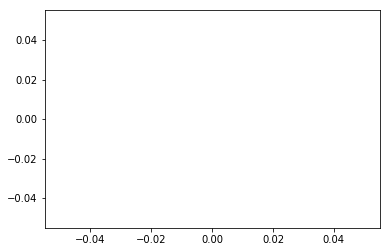

In [51]:
import matplotlib.pyplot as plt
plt.plot(rn.losses)
plt.plot(rn.val_losses)
plt.show()

In [52]:
rn.score(x_val_onehot, y_val)

0.504

### 6.4 케라스를 이용한 순환 신경망 구현 --- p.44

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

In [55]:
model = Sequential()

model.add(SimpleRNN(32, input_shape=(100,100)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                4256      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
history = model.fit(x_train_onehot, y_train, epochs=10, batch_size=32,
                   validation_data=(x_val_onehot, y_val))

Epoch 1/10
625/625 [==============================] - 6s 9ms/step - loss: 0.6871 - accuracy: 0.5539 - val_loss: 0.6681 - val_accuracy: 0.5846
Epoch 2/10
625/625 [==============================] - 7s 10ms/step - loss: 0.6551 - accuracy: 0.6156 - val_loss: 0.6315 - val_accuracy: 0.6430
Epoch 3/10
625/625 [==============================] - 7s 12ms/step - loss: 0.6325 - accuracy: 0.6457 - val_loss: 0.6303 - val_accuracy: 0.6416
Epoch 4/10
625/625 [==============================] - 8s 12ms/step - loss: 0.6154 - accuracy: 0.6624 - val_loss: 0.5870 - val_accuracy: 0.6912
Epoch 5/10
625/625 [==============================] - 8s 12ms/step - loss: 0.6076 - accuracy: 0.6708 - val_loss: 0.5827 - val_accuracy: 0.6998
Epoch 6/10
625/625 [==============================] - 10s 16ms/step - loss: 0.5979 - accuracy: 0.6820 - val_loss: 0.5768 - val_accuracy: 0.7038
Epoch 7/10
625/625 [==============================] - 9s 15ms/step - loss: 0.5904 - accuracy: 0.6907 - val_loss: 0.5776 - val_accuracy: 0.6966

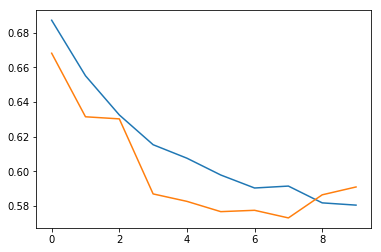

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

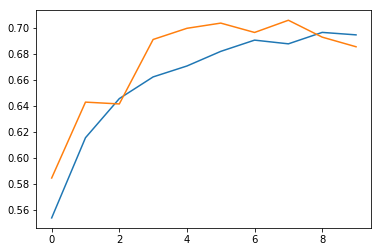

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [60]:
loss, accuracy = model.evaluate(x_val_onehot, y_val, verbose=0)
print(accuracy)

0.6855999827384949


In [63]:
from tensorflow.keras.layers import Embedding

(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)
for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [64]:
maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [65]:
model_ebd = Sequential()
model_ebd.add(Embedding(1000, 32))
model_ebd.add(SimpleRNN(8))
model_ebd.add(Dense(1, activation='sigmoid'))
model_ebd.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 32,337
Trainable params: 32,337
Non-trainable params: 0
_________________________________________________________________


In [66]:
model_ebd.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_ebd.fit(x_train_seq, y_train, epochs=10, batch_size=32, 
                        validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 6s 9ms/step - loss: 0.5475 - accuracy: 0.7234 - val_loss: 0.4688 - val_accuracy: 0.7906
Epoch 2/10
625/625 [==============================] - 6s 9ms/step - loss: 0.4145 - accuracy: 0.8223 - val_loss: 0.4362 - val_accuracy: 0.8098
Epoch 3/10
625/625 [==============================] - 6s 9ms/step - loss: 0.3744 - accuracy: 0.8420 - val_loss: 0.4494 - val_accuracy: 0.8090
Epoch 4/10
625/625 [==============================] - 7s 11ms/step - loss: 0.3474 - accuracy: 0.8561 - val_loss: 0.4326 - val_accuracy: 0.8132
Epoch 5/10
625/625 [==============================] - 7s 11ms/step - loss: 0.3231 - accuracy: 0.8659 - val_loss: 0.4532 - val_accuracy: 0.8092
Epoch 6/10
625/625 [==============================] - 7s 12ms/step - loss: 0.3118 - accuracy: 0.8718 - val_loss: 0.4451 - val_accuracy: 0.8092
Epoch 7/10
625/625 [==============================] - 7s 11ms/step - loss: 0.2933 - accuracy: 0.8810 - val_loss: 0.4499 - val_accuracy: 0.8110
Ep

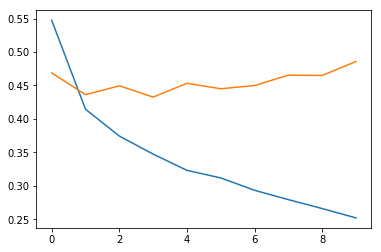

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

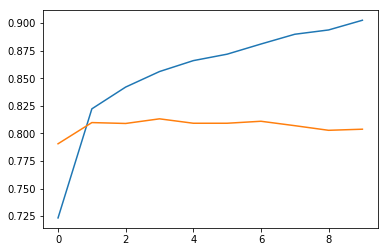

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [69]:
loss, accuracy = model_ebd.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.8037999868392944
